In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/A_ProjetIFT603/* .

Mounted at /content/drive


In [ ]:
# Importation des bibliotheuques necessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams['figure.figsize'] = (14.0, 8.0) 


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import plotly.express as px 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn import preprocessing

In [ ]:
from Random_Forest import RandForestClassifier
from LogisticRegression import LogisticRegressionClassifier
from svm_classifieur import svmClassifier
from knn_classifier import KNNClassifier
from Neuralnetwork_classifier import NNClassifier
from decision_trees_classifier import DTSClassifier



In [ ]:
# Importation des données
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(["id"], axis=1, inplace=True) 

In [ ]:
data.shape

(5110, 11)

In [ ]:
#statistiques descriptives sur les données
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#le type des variables
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

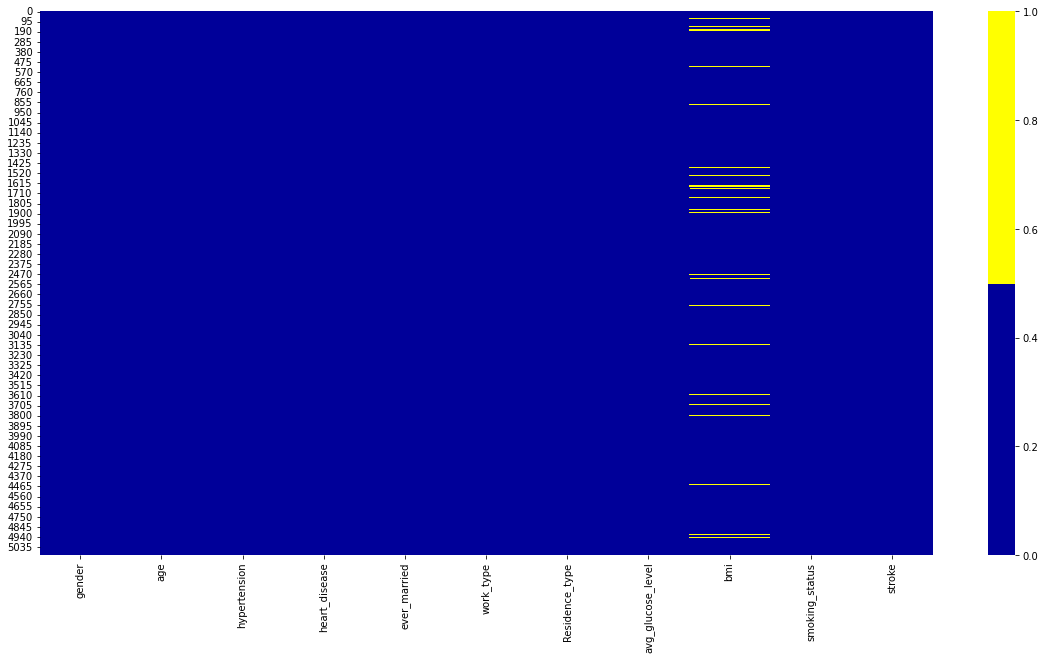

In [ ]:
# chercher les valeurs nulles
plt.figure(figsize = (20,10))
cols = data.columns[:76] # first 76 columns
colours = ['#000099', '#ffff00'] # coleurs - jaune null. bleue pas null.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
taux_bmi_null=data["bmi"].isnull().sum()/data.shape[0]*100
print("le taux de la variable bmi en pourcentage", taux_bmi_null)

le taux de la variable bmi en pourcentage 3.9334637964774952


In [ ]:
data["bmi"].median()

28.1

In [ ]:
# nous remplaçons les valeurs nulles de la vraiables bmi par sa mediane
data["bmi"]=data["bmi"].replace(np.nan, data["bmi"].median())

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# la repartition des personnes atteintes selon le genre
y = data["stroke"]  
fig = px.pie(values=y, names=data["gender"]) 
fig.show()

Segmentation de notre dataset selon la tranche d age afin de visualiser la tranche d age la plus touchée par les attaques cardiaques

In [ ]:
labels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 100, 20) ]
c = pd.cut(data.age, np.arange(0, 101, 20),
           include_lowest=True, right=False,
           labels=labels)

df=data.groupby(c).sum()
var=df["age"].index
var
df["var"]=var

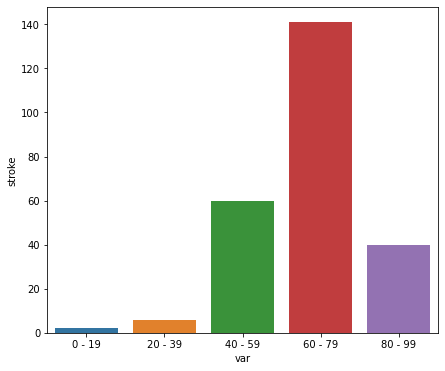

In [ ]:
plt.figure(figsize=(7, 6))
sns.barplot(x='var',y="stroke",  data=df);

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

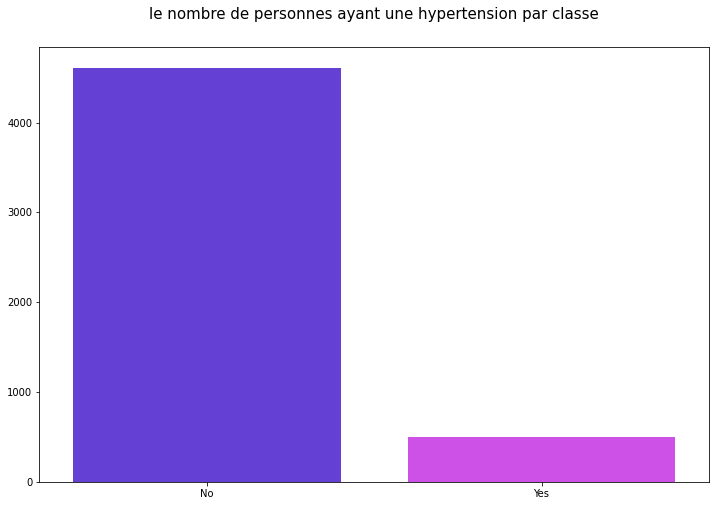

In [ ]:
two_colors = ['#dd38ff', '#5727ed']
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=data.hypertension,
                            palette=two_colors[::-1])
hypertension_plot.set_title('le nombre de personnes ayant une hypertension par classe',
                      fontsize=15, y=1.05)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=10)

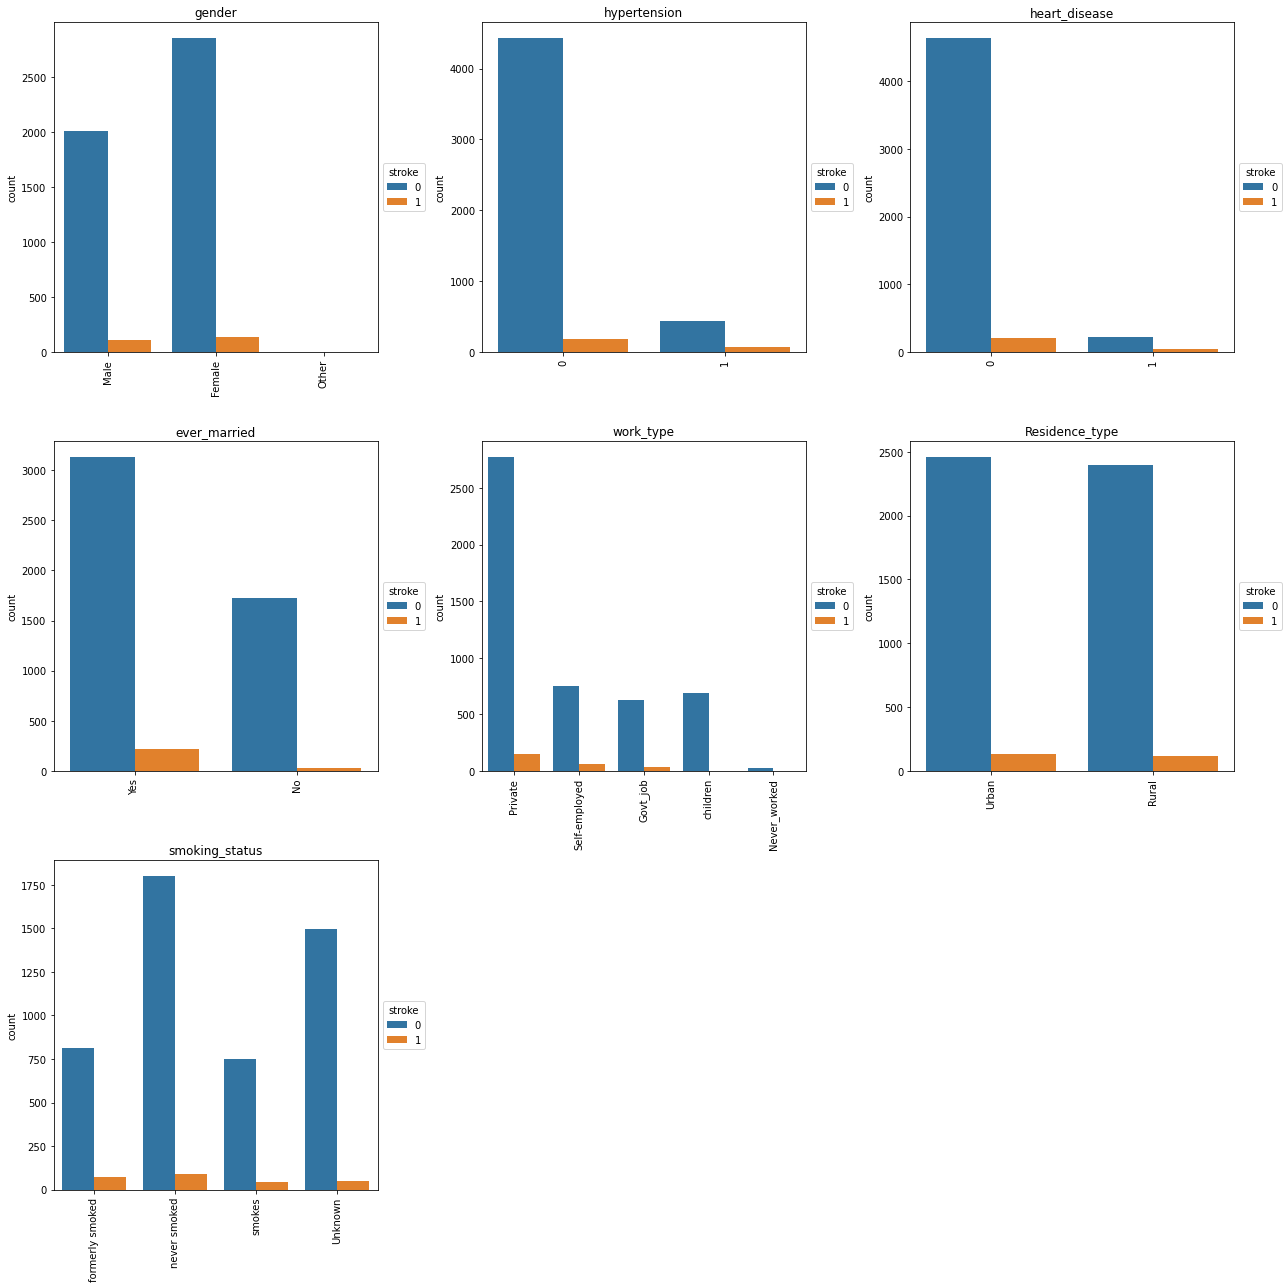

In [ ]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
    
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']
dnum=data[column_numerical]


In [ ]:
#On peut faire une normalisation des données numeriques 
#mais on aurra un array il faut apres le tranformer en pandas donc on choisi de faire une fonction qui normalise les donnee

def normalisations(df):
    return (df - df.min()) / ( df.max() - df.min())
df_num = normalisations(dnum)



In [ ]:
#♣ On decide d encoder nos variables categorielles selon le one hot vector
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']
                      
d_cat=data[column_categorical]
ohe = OneHotEncoder(sparse=False)

ohe.fit(d_cat)

X_train_ohe = ohe.transform(d_cat)

In [ ]:
column_ohe = ohe.get_feature_names_out(column_categorical)
column_ohe

array(['gender_Female', 'gender_Male', 'gender_Other', 'hypertension_0',
       'hypertension_1', 'heart_disease_0', 'heart_disease_1',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

In [ ]:
#Dans cette partie le dataset contenant les variables numeriques et le dataset contenant les valeurs categorielles encode en onehot 
d_cat_pd = pd.DataFrame(X_train_ohe, columns=column_ohe, index=d_cat.index)
data_f=pd.concat([d_cat_pd, df_num], axis = 1)
data_f

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.816895,0.801265,0.301260
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743652,0.679023,0.203895
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.975586,0.234512,0.254296
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.597168,0.536008,0.276060
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.975586,0.132167,0.203895
5106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.987793,0.323516,0.340206
5107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.426270,0.128658,0.232532
5108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.621582,0.513203,0.175258


In [ ]:
data_f["stroke"]=data["stroke"]
#print(df_num.head())
df_cor = data_f.corr("pearson")
cor_target = abs(df_cor["stroke"])
best_attributes = cor_target.sort_values(ascending=False).iloc[:11]


print(f"la correlation attributs:\n{best_attributes.drop('stroke')}")
best_attributes = list(best_attributes.index)

la correlation attributs:
age                               0.245257
heart_disease_1                   0.134914
heart_disease_0                   0.134914
avg_glucose_level                 0.131945
hypertension_1                    0.127904
hypertension_0                    0.127904
ever_married_Yes                  0.108340
ever_married_No                   0.108340
work_type_children                0.083869
smoking_status_formerly smoked    0.064556
Name: stroke, dtype: float64


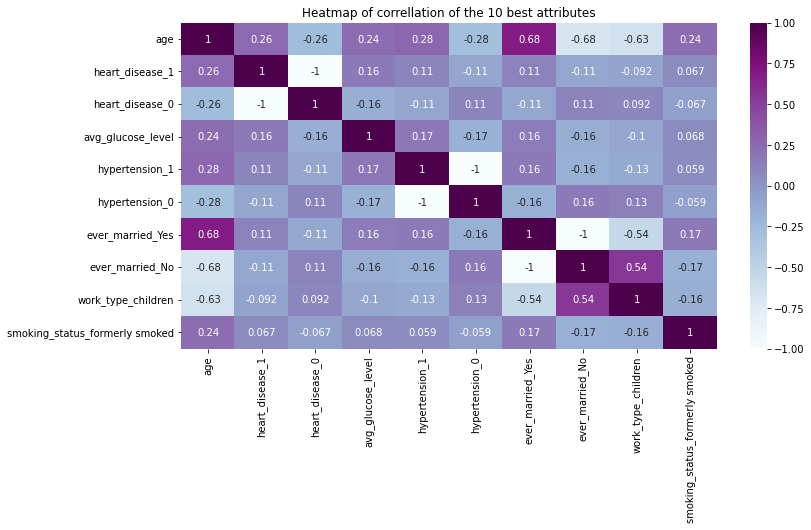

In [ ]:
# Correlation entre nos 5 meilleurs variables
# nous constatons qu il n y a pas une forte correlation entre nos variable, donc on fait pas fasse a un probleme de multicolinearite
df_cov = data_f.loc[:, best_attributes[1:]].T
covariance_matrix = np.corrcoef(df_cov)

plt.figure(figsize = (12,6))
sns.heatmap(covariance_matrix, annot=True, cmap="BuPu", xticklabels=best_attributes[1:], yticklabels=best_attributes[1:])
plt.title("Heatmap of correllation of the 10 best attributes")      
plt.show()

In [ ]:
# Nous allons diviser nos donnees en donnee de train, test et validation
y_train = data_f["stroke"]
X_train = data_f.drop(["stroke"], axis=1)
test_perc = 0.2
X_t, X_test, y_t, y_test = train_test_split(X_train, y_train, test_size=test_perc, random_state=0, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1, random_state=0, shuffle=True)


In [ ]:
# Vu que ns donnees ne sont pas balencees, il serait difficile pour nous de concevoir des models performents
# Nous decidons d augmnter nos donnees de train afin de concevoir un bon model
smote = SMOTE(random_state=0)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

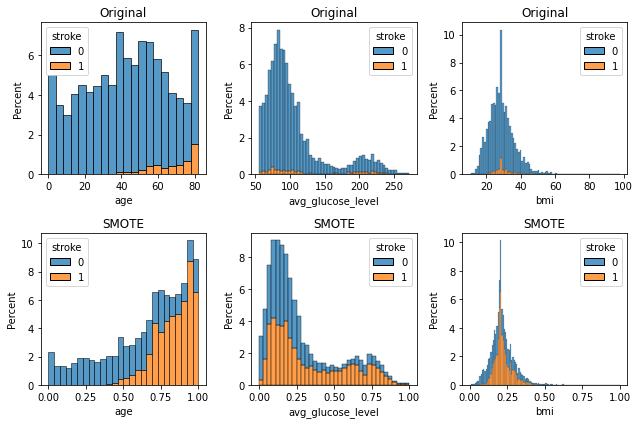

In [ ]:
# visualusons nos donnee avant et apres le balancing
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

data_resampled = pd.concat([X_train_res_df, y_train_res_df], axis=1)

column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(2, 3, figsize=(9,6))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_resampled, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i+3])
  axes_list[i+3].set_title('SMOTE')

plt.tight_layout()
plt.show()

Implementation des modeles

La foret aleatoire

Une random forest est un estimateur qui utilise plusieurs arbres de décision pour palier à la tendance de sur-apprentissage de ceux-ci. Chaque arbre apprend sur les données d'entrée avec des paramètres différents puis l'estimateur classe les points par la probabilité la plus haute pour tout les arbres.

In [ ]:
scorers = {"Accuracy": 'accuracy', "Precision": 'precision_micro', "F1": 'f1_micro'}
model1 = RandForestClassifier(X_train_res, y_train_res, X_val, y_val, scorers)
model1.train_default(verbose=True)

Accuracy des donne de validation: 90.220%


RF - Recherche hyper-paramètres
On fait une recherche d'hyper-paramètres sur :

n_estimators : Nombre d'arnres dans la forêt (plus grand = meilleurs approximation, plus long à calculer)

max_depth : La profondeur maximal des arbres (plus grand = plus de sur-apprentissage, plus long à calculer)

min_samples_leaf : Nombre d'éléments minimum necessaire dans un noeud

min_samples_split : Nombre d'éléments dans un noeud pour pouvoir le séparer

max_features : Nombre de caractéristique considéré pour séparer un noeud

In [ ]:
# recherche d hyperparametre 
randForest_param = {
    'n_estimators': [10, 50, 100, 200, 300],   
    'max_depth': [None, 8, 16, 32],   
    'min_samples_leaf': [2, 3, 4, 5],   
    'min_samples_split': [4, 6, 8, 10],   
    'max_features': ['log2', 'sqrt']  
}
model1.train_hyperparameter(randForest_param, random_search=True, verbose=True)


Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best cross val accuracy : 0.9383765841327497
Best estimator:
RandomForestClassifier(max_depth=16, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=300, n_jobs=4)

Accuracy validation: 87.775%


On peut alors prédire les classes pour l'ensemble de données de test.

In [ ]:
y_pred1=model1.predict(X_test)
accurracy1=accuracy_score(y_pred1, y_test)
accurracy1

0.8874755381604696

Classifieur par regression logistique

La régression logistique est un algorithme d’apprentissage automatique utilisé dans les problèmes de classification et qui a pour but attribuer des observations à un ensemble discret de classes, c’est un modèle linéaire. Grâce à la fonction sigmoïde logistique, la régression logistique transforme sa sortie en une probabilité d'appartenir à l'une ou à l'autre classe dans le cas binaire.




In [ ]:
model2 = LogisticRegressionClassifier(X_train_res, y_train_res, X_val, y_val, scorers)
model2.train_sans_grid()

Accuracy des donne de validation: 73.594%


RegL - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :
C : inverse de la régularisation,
solver : Algorithme à utiliser pour l optimisation
penalty : 'l2'





In [ ]:
# recherche d hyperparametre 
LogisticRegression_param = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
}
model2.train(LogisticRegression_param, random_search=True)

Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best cross val accuracy : 0.7923936063057508
Best estimator:
LogisticRegression(C=100, n_jobs=4)

Accuracy validation: 73.594%


RegL - Prédiction des valeurs de test
On peut alors prédire les classes pour l'ensemble de données de test et calculer l'accuracy.

In [ ]:
y_pred2=model2.predict(X_test)

accuracy2=accuracy_score(y_pred2, y_test)
accuracy2

0.7661448140900196

Classifieur par SVM

Les machines à vecteurs support (SVM) sont des algorithmes d’apprentissage supervisé utilisées pour la classification et la régression. Elles reposent souvent sur l’utilisation de noyaux qui permettent de transformer l’espace de représentation des données d’entrées en un espace de plus grande dimension, dans lequel il existe une séparation linéaire, le but est de maximiser la distance entre les groupes de données.

In [ ]:
model3 = svmClassifier(X_train_res, y_train_res,X_val, y_val,scorers)
model3.train_sans_grid()

Accuracy des donne de validation: 79.951%


SVM - Recherche hyper-paramètres
On fait une recherche d'hyper-paramètres sur :

C : ajoute une pénalité pour chaque point de données mal classé

kernel : choix des noyaux

gamma : paramètre pour les hyperplans non linéaires. Plus il est grand, plus la machine essaie de s'ajuster exactement sur l'ensemble des données d'apprentissage.

In [ ]:

svm_param = {'C': [0.1,1, 10, 100], 
                    'gamma': [1,0.1,0.01,0.001],
                    'kernel': ['rbf', 'poly']}
model3 = svmClassifier(X_train_res, y_train_res,X_val, y_val,scorers)
accu_val_hyperparm3, best_estimator3,a=model3.train(svm_param, random_search=True)


Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best cross val accuracy : 0.911925031265946
Best estimator:
SVC(C=10, gamma=1, probability=True)

Accuracy validation: 84.841%


On peut alors prédire les classes pour l'ensemble de données de test et calculer l'accuracy.

In [ ]:
y_pred3=model3.predict(X_test)
accuracy3=accuracy_score(y_pred3, y_test)

Classifieur par KNeighbors

Une KNeighbors est une méthode d’apprentissage basé sur des exemples ou d’apprentissage non généralisé. Elle ne cherche pas à construire un modèle interne général, mais simplement à stocker des exemples de données de formation. La classification est calculée à la majorité simple des voisins les plus proches de chaque point: une classe de données est attribuée à un point de requête qui a le plus de représentants parmi les voisins les plus proches de ce point.

In [ ]:
model4 = KNNClassifier(X_train, y_train, X_val, y_val, scorers)
model4.train_sans_grid()

Accuracy des donne de validation: 94.866%


KNN - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :

n_neighbors : le nombre de voisins utilisés par défaut pour interroger.

leaf_size : dépend de la nature du problème.

weights : la mesure de poids utilisée pour la prédiction.

metric : La mesure de distance à utiliser pour l’arbre.

In [ ]:
KNN_param = {
    'n_neighbors': list(range(1, 100)),
    'leaf_size': list(range(1, 100)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

accu_val_hyperparm, best_estimator, best_accu = model4.train(KNN_param, random_search=True)

print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))

print("[Estimator parameters]")

print('L Accuracy de la validation: {:.3%}'.format(accu_val_hyperparm))

Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best cross val accuracy : 0.9505301685891748
Best estimator:
KNeighborsClassifier(leaf_size=81, metric='manhattan', n_jobs=4, n_neighbors=92)

Accuracy validation: 96.822%
best_cross_val_acc : 0.9505301685891748

Best estimator:
KNeighborsClassifier(leaf_size=81, metric='manhattan', n_jobs=4, n_neighbors=92)
[Estimator parameters]
L Accuracy de la validation: 96.822%


KNN - Prédiction des valeurs de test On peut alors prédire les classes pour l'ensemble de données de test et calculer l'accuracy.

In [ ]:
y_pred4=model4.predict(X_test)
accuracy4=accuracy_score(y_pred4, y_test)

Classifieur par réseau de neurones

Un réseau de neurones est un algorithme d’apprentissage supervisé de plusiers fonctions d’apprentissage. Il calcule la prédiction et la compare avec la valeur de y à l'aide de la fonction de coût et l'erreur est propagé en arrière afin de mettre à jour les poids des différentes fonctions.

In [ ]:
model5 = NNClassifier(X_train, y_train, X_val, y_val, scorers)
model5.train_sansGrid()

Accuracy validation: 95.844%


NN - Recherche hyper-paramètres

On fait une recherche d'hyper-paramètres sur :

hidden_layer_sizes : Taille des couches cachées du réseau

solveur : Méthode d'optimisation des poids W

learning_rate_init : Longueur initial des pas lors de la descente de gradient

alpha : Terme de régularisation L2, correspond à la pénalité sur la taille des poids dans W

In [ ]:
# recherche hyperparametre
NN_param = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [1e-2, 1e-1, 1.0, 10.0],
    'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
}

accu_val_hyperparm5, best_estimator5= model5.train_hyperparameter(NN_param, random_search=True, verbose=True)


Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best cross val accuracy : 0.9505301685891748
Best estimator:
MLPClassifier(alpha=0.01, hidden_layer_sizes=(200,), learning_rate_init=10.0,
              max_iter=800)

Accuracy validation: 96.822%


NN - Prédiction des valeurs de test

On peut alors prédire les classes pour l'ensemble de données de test et calculer l'accuracy.

In [ ]:
y_pred5=model5.prediction(X_test)
accuracy5=accuracy_score(y_pred5, y_test)

Classifieur par Decision trees

Une decision trees est un méthode d’apprentissage supervisé non paramétrique pour la classification et la régression. Notre objectif est de créer un modèle qui prédit la valeur de la variable cible en apprenant des règles de décision simples déduites des caractéristiques des données. L’arbre peut être considéré comme une approximation constante par segments.

In [ ]:
model6 = DTSClassifier(X_train, y_train, X_val, y_val, scorers)
model6.train_sans_grid()


Accuracy validation: 93.154%


DTS - Recherche hyper-paramètres
On fait une recherche d'hyper-paramètres sur :

max_depth : La profondeur maximale de l'arbre.

min_samples_split : Nombre minimal d’échantillons requis pour diviser un noeud interne.

criterion : Fonction de mesurer de qualité de division. ("gini" pour les impuretés gini ou "entropy" pour les informations d'entropie)

In [ ]:
DTS_param = {
    'max_depth': [None, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 50000, 100000],
    'min_samples_leaf': list(range(2, 6)),
    'criterion': ['gini', 'entropy']
}

model6 = DTSClassifier(X_train, y_train, X_val, y_val,scorers)
accu_val_hyperparm, best_estimator, best_accu = model6.train(DTS_param, random_search=True)
print('best_cross_val_acc : {}'.format(best_accu))
print('\nBest estimator:\n{}'.format(best_estimator))



Using randomized search:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_cross_val_acc : 0.9306895149364094

Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=2000, min_samples_leaf=5)


Faire la prediction sur les donnees de test et calculer l'accuracy

In [ ]:
y_pred6=model6.predict(X_test)
accuracy6=accuracy_score(y_pred6, y_test)

**Comparaison des modeles **

In [ ]:
accu_dict={
    "Foret_aleatoire" : accurracy1,
    "LogisticRegression": accuracy2,
    "SVM": accuracy3,
    "n_neighbord": accuracy4,
    "neural_classifier": accuracy5,
    "decision_tree": accuracy6,


}

,Accuracy
Foret_aleatoire,0.887476
LogisticRegression,0.766145
SVM,0.839530
n_neighbord,0.947162
neural_classifier,0.947162
decision_tree,0.929550


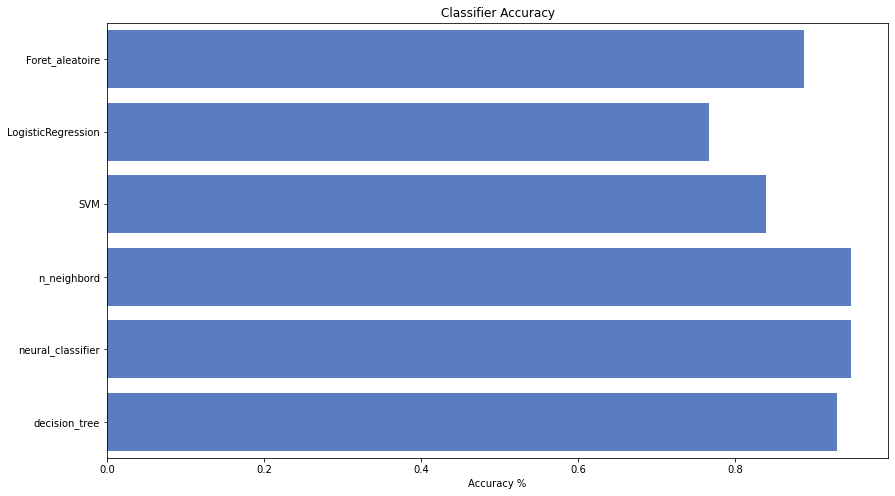

In [ ]:
df_accu = pd.DataFrame.from_dict(accu_dict, orient='index', columns=['Accuracy'])
display(df_accu)

sns.set_color_codes("muted")
sns.barplot(data=df_accu, x="Accuracy", y=df_accu.index, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()